In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import roc_curve, auc

In [2]:
# Load and preprocess data
data1 = pd.read_csv("C:/Users/User/Bank Transactions Analysis/BankTransactionData_Cleaned.csv")

# Display the first few rows of the dataset
print("Dataset Preview:\n", data1.head())

Dataset Preview:
   TransactionID AccountID  TransactionAmount      TransactionDate  \
0      TX000001   AC00128              14.09  2023-04-11 16:29:14   
1      TX000002   AC00455             376.24  2023-06-27 16:44:19   
2      TX000003   AC00019             126.29  2023-07-10 18:16:08   
3      TX000004   AC00070             184.50  2023-05-05 16:32:11   
4      TX000005   AC00411              13.45  2023-10-16 17:51:24   

  TransactionType   Location DeviceID      IP Address MerchantID Channel  \
0           Debit  San Diego  D000380  162.198.218.92       M015     ATM   
1           Debit    Houston  D000051     13.149.61.4       M052     ATM   
2           Debit       Mesa  D000235  215.97.143.157       M009  Online   
3           Debit    Raleigh  D000187  200.13.225.150       M002  Online   
4          Credit    Atlanta  D000308    65.164.3.100       M091  Online   

   CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
0           70             Doctor    

In [3]:
# Feature engineering and encoding
data1['TransactionType'] = data1['TransactionType'].astype('category').cat.codes
data1['Channel'] = data1['Channel'].astype('category').cat.codes

In [4]:
# Target variable (example: Fraud)
# Define the threshold for fraud detection
threshold = 1000

# Target variable (example: Fraud)
data1['Fraud/Suspicious Transactions'] = (data1['TransactionAmount'] > threshold).astype(int)

# Check the first few rows of the data to verify the 'Fraud' column
print(data1[['TransactionAmount', 'Fraud/Suspicious Transactions']].head())

# Check the distribution of 'Fraud' values (how many 0s and 1s)
print(data1['Fraud/Suspicious Transactions'].value_counts())

# Check if any 'TransactionAmount' is greater than 1000 (should be flagged as 1)
print(data1[data1['TransactionAmount'] > 1000][['TransactionAmount', 'Fraud/Suspicious Transactions']])

# Check if any 'TransactionAmount' is less than or equal to 1000 (should be flagged as 0)
print(data1[data1['TransactionAmount'] <= 1000][['TransactionAmount', 'Fraud/Suspicious Transactions']])

   TransactionAmount  Fraud/Suspicious Transactions
0              14.09                              0
1             376.24                              0
2             126.29                              0
3             184.50                              0
4              13.45                              0
0    2422
1      90
Name: Fraud/Suspicious Transactions, dtype: int64
      TransactionAmount  Fraud/Suspicious Transactions
74              1212.51                              1
85              1340.19                              1
110             1045.22                              1
129             1036.66                              1
141             1049.92                              1
...                 ...                            ...
2334            1105.88                              1
2342            1021.16                              1
2380            1173.74                              1
2403            1493.00                              1
2414         

In [5]:
# Splitting data
X = data1[['TransactionAmount', 'TransactionType', 'Channel', 'CustomerAge', 'TransactionDuration']]
y = data1['Fraud/Suspicious Transactions']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Train logistic regression
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       484
           1       0.95      1.00      0.97        19

    accuracy                           1.00       503
   macro avg       0.97      1.00      0.99       503
weighted avg       1.00      1.00      1.00       503

ROC AUC: 0.9989669421487603


D:\Users\User\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


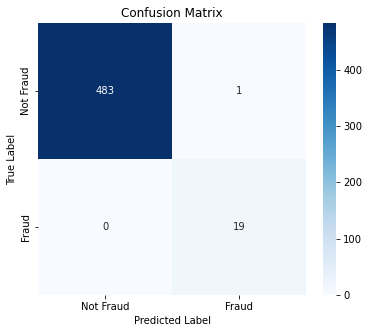

In [7]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

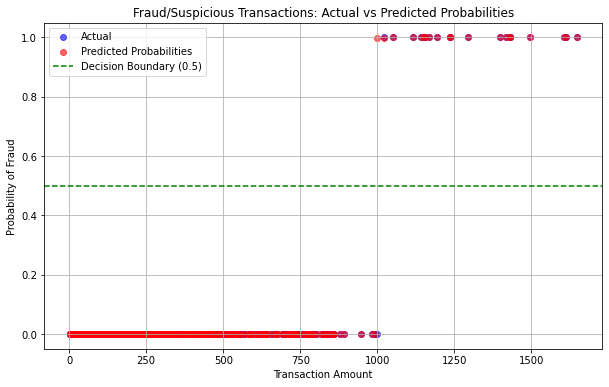

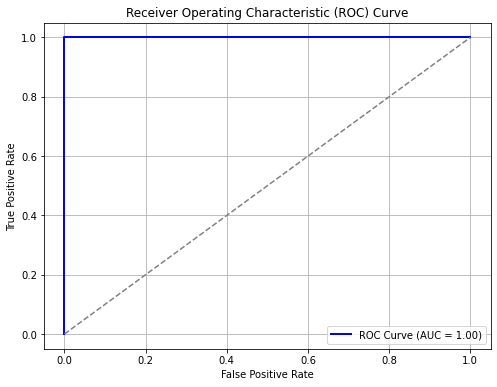

In [8]:
# Predict probabilities
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Plot the predicted probabilities
plt.figure(figsize=(10, 6))
plt.scatter(X_test['TransactionAmount'], y_test, color='blue', label='Actual', alpha=0.6)
plt.scatter(X_test['TransactionAmount'], y_pred_prob, color='red', label='Predicted Probabilities', alpha=0.6)
plt.axhline(0.5, color='green', linestyle='--', label='Decision Boundary (0.5)')
plt.title("Fraud/Suspicious Transactions: Actual vs Predicted Probabilities")
plt.xlabel("Transaction Amount")
plt.ylabel("Probability of Fraud")
plt.legend()
plt.grid()
plt.show()

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()